In [3]:
# Necessary Imports

import ktrain
from ktrain import text
import pickle as p
from keras.callbacks import ModelCheckpoint
import numpy as np

Using TensorFlow backend.


# Load Data

In [0]:
with open('Dataset/processed_data/data.pkl','rb') as f:
  x_train = p.load(f)
with open('/content/gdrive/My Drive/aclImdb/datatest.pkl','rb') as f:
  x_test = p.load(f)
y_train = np.load('/content/gdrive/My Drive/aclImdb/labels.npy')
y_test = np.load('/content/gdrive/My Drive/aclImdb/labelstest.npy')

In [0]:
classes = ['positive' , 'negative' , 'neutral']

# Create bert-ready data

In [117]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                       x_test=x_test, y_test=y_test,
                                                                       class_names=classes,
                                                                       preprocess_mode='bert',
                                                                       maxlen=64, 
                                                                       max_features=50000)

preprocessing train...


preprocessing test...


# Load Bert-base uncased model

In [0]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [119]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train),val_data=(x_test, y_test) ,batch_size=16)

Is Multi-Label? False
maxlen is 64
done.


In [120]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        (None, 64)           0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      (None, 64)           0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 64, 768), (3 23440896    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 64, 768)      1536        Input-Segment[0][0]              
____________________________________________________________________________________________

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
13618/13618 [==============================] - 11s 811us/step - loss: 1.5291 - acc: 0.3407
Epoch 2/1024
12208/13618 [=========================>....] - ETA: 0s - loss: 1.4197 - acc: 0.3857

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


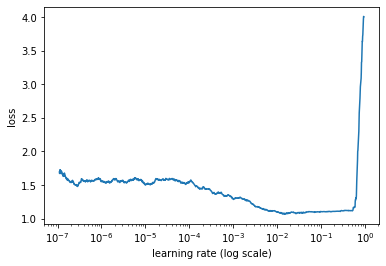

In [81]:
# Try with different learning rates to determine optimal

learner.lr_find()
learner.lr_plot()

# Training

In [122]:
learner.autofit(2e-5, 3, callbacks = callbacks_list)



begin training using triangular learning rate policy with max lr of 2e-05...
Train on 15131 samples, validate on 1869 samples
Epoch 1/3
15131/15131 [==============================] - 201s 13ms/step - loss: 0.9211 - acc: 0.5425 - val_loss: 0.9707 - val_acc: 0.5484

Epoch 00001: loss improved from inf to 0.92112, saving model to /content/gdrive/My Drive/aclImdb/model.h5
Epoch 2/3
15131/15131 [==============================] - 179s 12ms/step - loss: 0.7841 - acc: 0.6414 - val_loss: 0.9846 - val_acc: 0.5661

Epoch 00002: loss improved from 0.92112 to 0.78408, saving model to /content/gdrive/My Drive/aclImdb/model.h5
Epoch 3/3
15131/15131 [==============================] - 178s 12ms/step - loss: 0.6803 - acc: 0.7063 - val_loss: 1.0440 - val_acc: 0.5548

Epoch 00003: loss improved from 0.78408 to 0.68025, saving model to /content/gdrive/My Drive/aclImdb/model.h5


# Evaluation

In [111]:
learner.validate(val_data=(x_test, y_test),class_names=classes)

              precision    recall  f1-score   support

    positive       0.61      0.56      0.59       582
    negative       0.57      0.61      0.59       533
     neutral       0.54      0.54      0.54       754

    accuracy                           0.57      1869
   macro avg       0.57      0.57      0.57      1869
weighted avg       0.57      0.57      0.57      1869



array([[328,  70, 184],
       [ 43, 323, 167],
       [168, 176, 410]])